#Importing Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys


ModuleNotFoundError: No module named 'google'

#Necessary Functions

><b>Description :</b> The function calculates the absolute pixel-wise difference between two input images RGB image and HSV image. It then converts the result to grayscale and scales the pixel values to the range [0, 255].


In [ ]:
def magnitude(img):
  row,col,ch = img.shape

  output = np.zeros([row, col])

  for i in range(row):
    for j in range (col):
      val = img[i, j]
      mag = np.sqrt(val.dot(val))
      output[i,j] = mag

  return output.astype(np.uint8)

In [ ]:
def difference(rgb_image,hsv_image):

  difference_img = abs(rgb_image - hsv_image)
  #difference_img = cv2.cvtColor(difference_img, cv2.COLOR_RGB2GRAY)
  difference_img = magnitude(difference_img)
  difference_img = 255 * ((difference_img - np.min(difference_img)) / (np.max(difference_img) - np.min(difference_img)))

  return difference_img

><b>Description :</b> The function scales the pixel values to the range [0, 255].

In [ ]:
def scale(arr):
  min_val = np.min(arr)
  max_val = np.max(arr)

  scaled_array = 255 * (arr - min_val) / (max_val - min_val)

  return scaled_array.astype(np.uint8)

><b>Description:</b> Generated histogram of an image

In [ ]:
def calculate_histogram(image):

    histogram = np.histogram(image.ravel(), bins=256, range=(0, 256))[0]

    return histogram

<h1>Task 1 (Histogram Equalization)</h1>

<h4>Apply the Global HE technique on color images.</h4>




><b>Description :</b> The function performs Global Histogram Equalization on an image.




In [ ]:
def global_histogram_equalization(image):
  h,w = image.shape
  N = h*w

  histogram = np.zeros(256)

  for i in image:
    histogram[i] += 1

  histogram = histogram/N
  cdf = histogram.cumsum()
  cdf = (255 * cdf / cdf[-1])

  result = cdf[image].astype(np.uint(8))

  return result

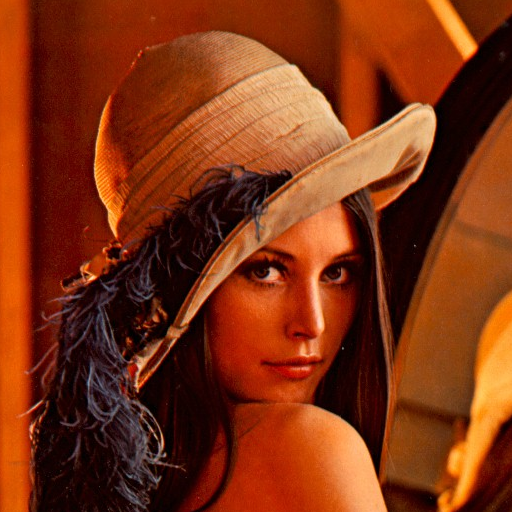

In [ ]:
#image_path = "/content/Fig0637(a)(caster_stand_original).tif"
image_path = "/content/Fig0646(a)(lenna_original_RGB).tif"
image2 = cv2.imread(image_path, cv2.IMREAD_COLOR )
image2 = cv2.resize(image2, (512, 512))
rgb_img = image2.copy()
hsv_img = image2.copy()
cv2_imshow(image2)

<h4>Global Histogram Equalization on RGB color image.</h4>


><b>Description :</b> It performs GHE on each of the RGB channel individually and then merge it to obtain the RGB image.


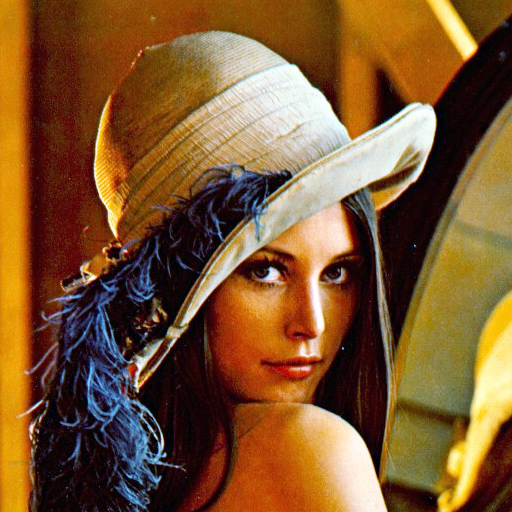

In [ ]:
r1 = rgb_img[:, :, 0]
r1 = global_histogram_equalization(r1)

g1 = rgb_img[:, :, 1]
g1 = global_histogram_equalization(g1)

b1 = rgb_img[:, :, 2]
b1 = global_histogram_equalization(b1)

rgb_GHE = cv2.merge([r1, g1, b1])

cv2_imshow(rgb_GHE)

<h4>Global Histogram Equalization in HSV color space.</h4>


><b>Description :</b> Converts the RGB image to HSV using `cv2.COLOR_RGB2HSV` function and performs GHE on the V or Intensity channel. Then it is converted back to RGB form to display.

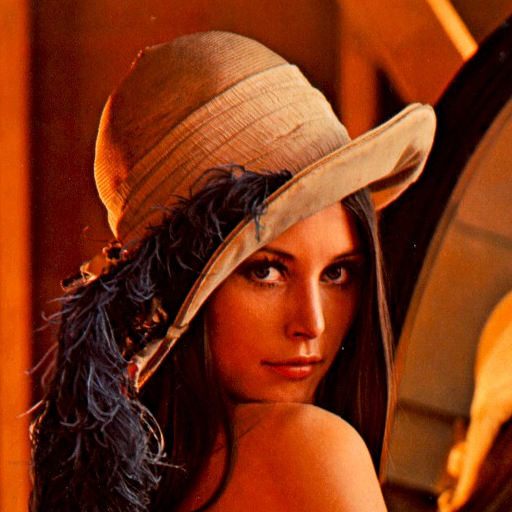

In [ ]:
hsv_image = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2HSV)
hsv_image[:, :, 2] = global_histogram_equalization(hsv_image[:, :, 2])
hsv_GHE = (cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR))
cv2_imshow(hsv_GHE)

In [ ]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print( hsv_green )

[[[ 90 255 255]]]


<h4>DIFFERENCE</h4>

><b>Description :</b> Both of the results were scaled to [0,255] then the difference was computed and its Grayscale form was displayed.

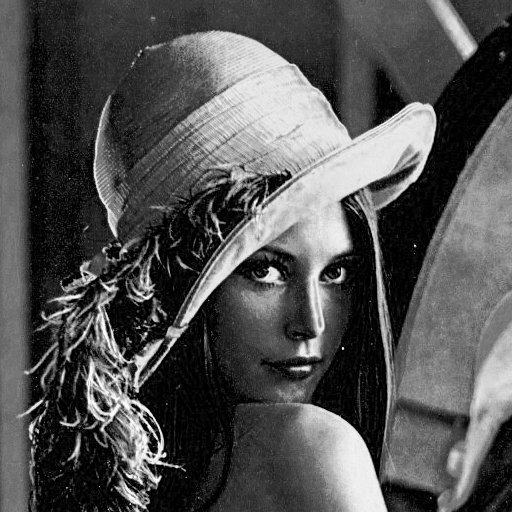

In [ ]:
#rgb_GHE = scale(rgb_GHE)
#hsv_GHE = scale(hsv_GHE)
smooth_difference = difference(rgb_GHE , hsv_GHE)
cv2_imshow(smooth_difference)

<h4>Do the HE results become same for both RGB and HSI models?</h4>

><b>Answer : </b> RGB histogram equalization works by equalizing the distribution of pixel values in each of the red, green, and blue channels. This can result in a significant change in color, as the relationships between the different channels are changed.

>In contrast, intensity histogram equalization only equalizes the distribution of pixel values in the intensity channel. This can result in an increase in image contrast, but the colors in the image will remain largely unchanged.

>The difference image shows that the pixel values in the RGB image are very different from the pixel values in the intensity-equalized image. This is because the RGB histogram equalization has changed the relationships between the different channels.
So, the difference appears to be like a grayscale image of the original image.
